# Анализ объявлений о продаже квартир

Необходимо выполнить анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Нужно определить какие факторы более всего влияют на рыночную стоимость квартиры.

# План работы

1. Изучение данных из файла
    1. Вывод
2. Предобработка данных
3. Расчёты и добавление результатов в таблицу
4. Исследовательский анализ данных
5. Общий вывод
6. Чек-лист готовности проекта

# Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
#В данных в качестве разделителя колонок используется "\t", поэтому при чтении файла указывается данный факт
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [381]:
#Вывод первых 5 строк файла
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [382]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [383]:
#Вывод сводной информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В таблице наблюдаются пропуски значений в 14 столбцах. Предварительно о количестве пропусков можно сказать следующее: В таблице всего 23699 строк. В столбцах "ceiling_height", "floors_total", "living_area", "is_apartment", "kitchen_area", "balcony", "locality_name", "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest", "days_exposition" содержатся пропуски.

Поиск строк-дубликатов не выявил повторяющихся строк. Количество строк-дубликатов равно 0:

In [384]:
#Нахождение строк-дубликатов
data.duplicated().sum()

0

## Предобработка данных

In [385]:
#Теперь найдём количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вычисленные данные о пропусках совпали с предварительными результатами. Как сказано в условиях задачи, логичную замену можно предположить только для пропусков значений в столбце "число балконов". Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал.

Далее требуется заполнить пропуски там где это возможно.

In [386]:
# Заполним пропуски в столбце balcony значением 0.
data['balcony'] = data['balcony'].fillna(0)

In [387]:
#Проверим результат.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков в столбце balcony больше нет.

Получим сводную информацию о таблице, чтобы узнать о текущих типах данных в каждом столбце

In [388]:
#Сводная информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Вывод: 

1.Требуется изменить тип данных в стобце "first_day_exposition" на "datetime64".

2.Требуется изменить тип данных в столбце "floors_total" на "int64", то есть на целочисленный, так как количество
этажей - это всегда целое число. Однако, пропуски NaN не позволят это сделать. Поэтому текущим является вещественный тип данных.

3.Требуется изменить тип данных в стобце "is_apartment" на "bool", так как здесь содержится булевый тип данных. Однако пропуски NaN не позволят это сделать. Поэтому текущим является смешанный тип данных.

4.Требуется изменить тип данных в столбце "balcony" на "int64", то есть на целочисленный, так как количество
балконов - это всегда целое число. Это возможно, так как после замены пропусков на целое число 0 , пропусков NaN не осталось.

5.Требуется изменить тип данных в столбце "airports_nearest" на "int64", то есть на целочисленный, так как расстояние до ближайшего аэропорта в метрах - это всегда целое число. Пропуски NaN не позволят это сделать.

6.Требуется изменить тип данных в столбце "cityCenters_nearest" на "int64", то есть на целочисленный, так как расстояние до центра города в метрах - это всегда целое число. Пропуски NaN не позволят это сделать.

7.Требуется изменить тип данных в столбце "parks_around3000" на "int64", то есть на целочисленный, так как "число парков в радиусе 3 км" - это всегда целое число. Пропуски NaN не позволят это сделать.

8.Требуется изменить тип данных в столбце "parks_nearest" на "int64", то есть на целочисленный, так как расстояние до ближайшего парка в метрах - это всегда целое число. Пропуски NaN не позволят это сделать. 

9.Требуется изменить тип данных в столбце "ponds_around3000" на "int64", то есть на целочисленный, так как "число водоёмов в радиусе 3 км" - это всегда целое число. Пропуски NaN не позволят это сделать.

10.Требуется изменить тип данных в столбце "ponds_nearest" на "int64", то есть на целочисленный, так как расстояние до ближайшего водоёма в метрах - это всегда целое число. Пропуски NaN не позволят это сделать.

11.Требуется изменить тип данных в столбце "days_exposition" на "int64", то есть на целочисленный, так как количество дней, в течении которых было размещено объявление (от публикации до снятия) - это всегда целое число. Пропуски NaN не позволят это сделать.

Возможно изменение типа данных только в пункте 1 и 4.

In [389]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [390]:
# Пункт 1
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

Если в каждом значении столбца "first_day_exposition" стоит время 00:00:00, то с таким же успехом можно было применить команду data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64') поскольку время в результате исчезает.

In [391]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [392]:
#Пункт 4
data['balcony'] = data['balcony'].astype('int64')

Было выполнено изменение типа данных по пунктам 1 и 4.

## Расчёты и добавление результатов в таблицу

In [393]:
#Вычислим цену квадратного метра каждой квартиры и поместим в новый столбец square_meter_price
data['square_meter_price'] = data['last_price'] / data['living_area']

In [394]:
#День недели, месяц и год публикации
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [395]:
#Категория этажа квартиры
data.loc[data['floor'] == 1, 'floor_categories'] = "Первый"
data.loc[data['floor'] == data['floors_total'],'floor_categories'] = "Последний"
data.loc[(data['floor'] > 1) & (data['floor'] < data['floors_total']), 'floor_categories'] = "Другой"

In [396]:
#Соотношение жилой и общей площади
data['living_area_ratio'] = data['living_area'] / data['total_area']

In [397]:
#Отношение площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

Вывод: Были добавлены и заполнены данными новые столбцы - 'square_meter_price','weekday_exposition','','month_exposition','year_exposition','floor_categories','living_area_ratio','kitchen_area_ratio'

## Исследовательский анализ данных

In [398]:
#Площадь, цена, число комнат, высота потолков - изучение содержимого заданных столбцов
data[['total_area','last_price','rooms','ceiling_height']].head(10)

,total_area,last_price,rooms,ceiling_height
0,108.00,13000000.0,3,2.70
1,40.40,3350000.0,1,NaN
2,56.00,5196000.0,2,NaN
3,159.00,64900000.0,3,NaN
4,100.00,10000000.0,2,3.03
5,30.40,2890000.0,1,NaN
6,37.30,3700000.0,1,NaN
7,71.60,7915000.0,2,NaN
8,33.16,2900000.0,1,NaN
9,61.00,5400000.0,3,2.50


In [399]:
#Применение корреляции Пирсона для изучения зависимости друг от друга площади, цены, числа комнат и высоты потолков
data[['total_area','last_price','rooms','ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.653675,0.758344,0.095490
last_price,0.653675,1.000000,0.363343,0.085430
rooms,0.758344,0.363343,1.000000,0.054457
ceiling_height,0.095490,0.085430,0.054457,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779d524810>,
      dtype=object)

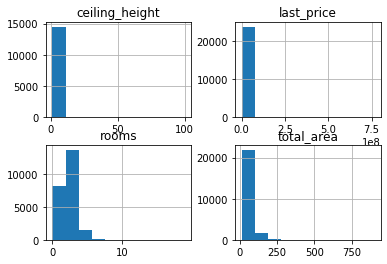

In [400]:
#Совместное построение гистограмм указанных параметров - площади, цены, числа комнат и высоты потолков
data[['total_area','last_price','rooms','ceiling_height']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779c8330d0>]],
      dtype=object)

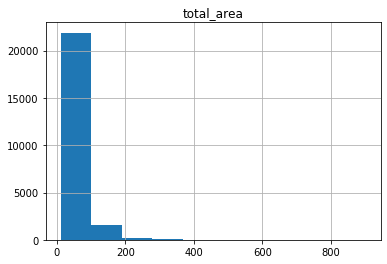

In [401]:
#Отдельное построение гистограмм. Площадь.
data.hist('total_area')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779cb75a10>]],
      dtype=object)

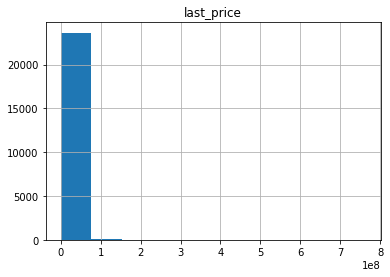

In [402]:
#Отдельное построение гистограмм. Цена.
data.hist('last_price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779c788a10>]],
      dtype=object)

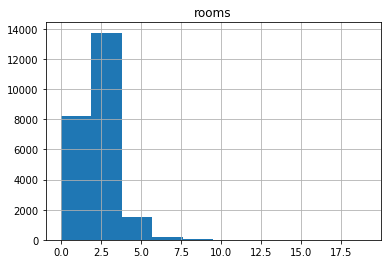

In [403]:
#Отдельное построение гистограмм. Количество комнат.
data.hist('rooms')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779c6b8410>]],
      dtype=object)

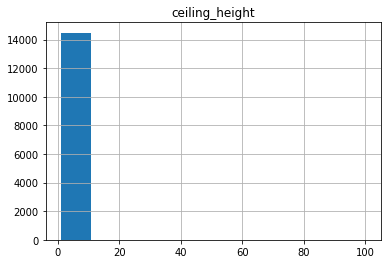

In [404]:
#Отдельное построение гистограмм. Высота потолков.
data.hist('ceiling_height')

Изучение времени продажи квартиры. Очевидно, что время продажи квартиры - это параметр days_exposition, то есть количество дней прошедших от публикации объявления до его снятия.

In [405]:
#Изучение времени продажи квартиры
data['days_exposition'].head(10)

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
7      NaN
8    189.0
9    289.0
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779c636a10>]],
      dtype=object)

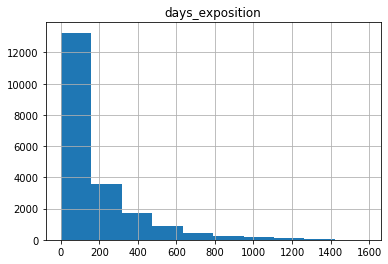

In [406]:
#Построение гистограммы по параметру days_exposition
data.hist('days_exposition')

In [407]:
#Определение среднего времени продажи
data['days_exposition'].mean()

180.88863436982163

In [408]:
#Определение медианы
data['days_exposition'].median()

95.0

Вывод: Медиана существенно отличается от среднего значения. Это значит, что половина продаж занимала меньше 95 дней, а обычно продажа квартиры занимала меньше 180 дней.

In [409]:
# Исследуем время продаж с помощью метода describe()
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Можно заключить, что если время продажи составило до 45 дней - эта продажа прошла очень быстро. Последняя же четверть значений - от 232 дней до максимума, 1580 дней, - говорит об очень медленных продажах.

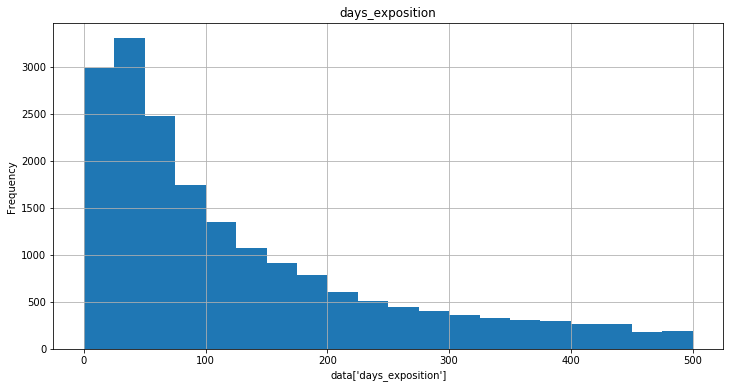

In [411]:
# Построение гистограммы с добавлением подписей осей.
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel("data['days_exposition']")
ax.set_ylabel("Frequency")
data.hist('days_exposition', range=(0,500), ax=ax, bins = 20)
plt.show()

In [412]:
#Исследование зависимости цены от площади
data['last_price'].corr(data['total_area'])

0.6536750579657244

Вывод: между указанными величинами наблюдается прямая заисимость.

In [413]:
#Исследование зависимости цены от числа комнат
data['last_price'].corr(data['rooms'])

0.36334284996489546

Вывод: между указанными величинами наблюдается прямая зависимость. Поскольку, значение коэффициента Пирсона меньше, то эта зависимость слабее, чем в предыдущем случае.

In [414]:
#Исследование зависимости цены от удаленности от центра
data['last_price'].corr(data['cityCenters_nearest'])

-0.20674734874298376

Вывод: между указанными величинами наблюдается слабая обратная зависимость. Об этом говорит отрицательное значение коэффициента Пирсона, небольшое по модулю.

In [415]:
#Исследование зависимости цены от категории этажа
def id_floor_categories(floor_category):
    if floor_category == 'Первый': return 1
    if floor_category == 'Последний': return 2
    if floor_category == 'Другой': return 3

In [416]:
data['id_floor_categories'] = data['floor_categories'].apply(id_floor_categories)
data['last_price'].corr(data['id_floor_categories'])

0.04082616121436608

Вывод: искать зависимость стоимости от категории этажа следует с учетом множества других факторов влияющих на стоимость. Например, искать такую зависимость лучше всего в одном доме среди квартир одной площади с одинаковым числом комнат. То есть стоит исключить влияние других факторов на цену, а без этого зависимость не будет найдена, о чем и свидетельствует коэффициент корреляции близкий к нулю.

Применение коэффициента корреляции Пирсона к остальным параметрам будет неэффективным, так как цена квартиры зависит от этих параметров нелинейно. Эту зависимость можно исследовать с помощью диаграммы рассеяния или матрицы диаграмм рассеяния. Однако, матрица даст нам искомую диаграмму рассеяния в уменьшенном масштабе и для изучения она будет малопригодна. Поэтому, построим одну диаграмму рассеяния, для каждой зависимости отдельно.

In [417]:
#Выделим необходимые для анализа столбцы и поместим их в sample
sample = data[['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition', 'id_floor_categories']]

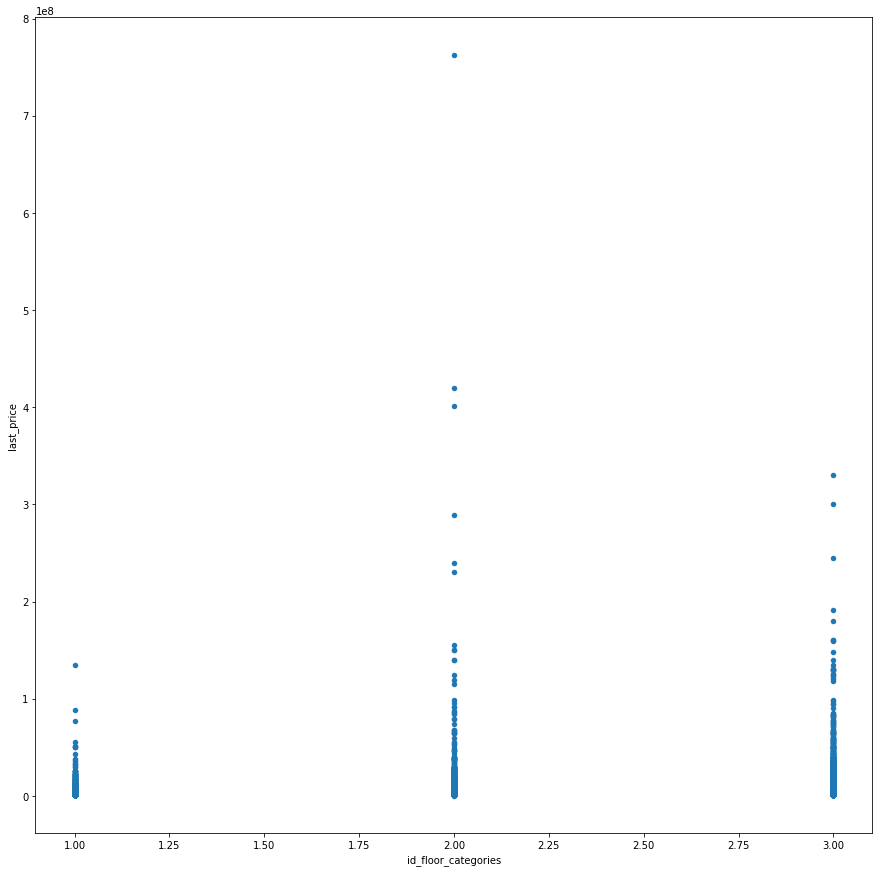

In [418]:
#Построим диаграмму зависимости цены от категории этажа
sample.plot(x='id_floor_categories', y='last_price', kind='scatter', figsize=(15, 15))

Глядя на построенную диаграмму можно сказать, что в целом самым дорогим на рынке является последний этаж, далее следуют другие этажи и самым дешевым можно считать первый этаж. Так можно описать зависимость цены от категории этажа.

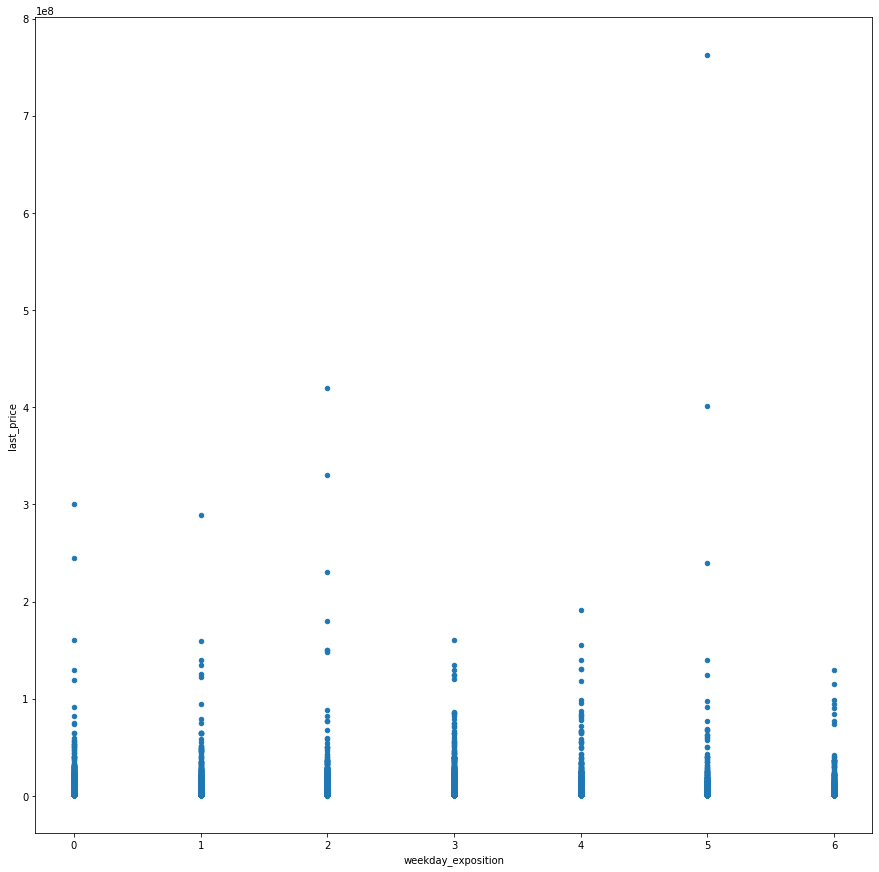

In [419]:
#Построим диаграмму зависимости цены от дня недели
sample.plot(x='weekday_exposition', y='last_price', kind='scatter', figsize=(15, 15))

По данным диаграммы самая дорогая квартира была размещена в субботу, то есть 5-й начиная с 0 день, а в целом заметной разницы не наблюдается.

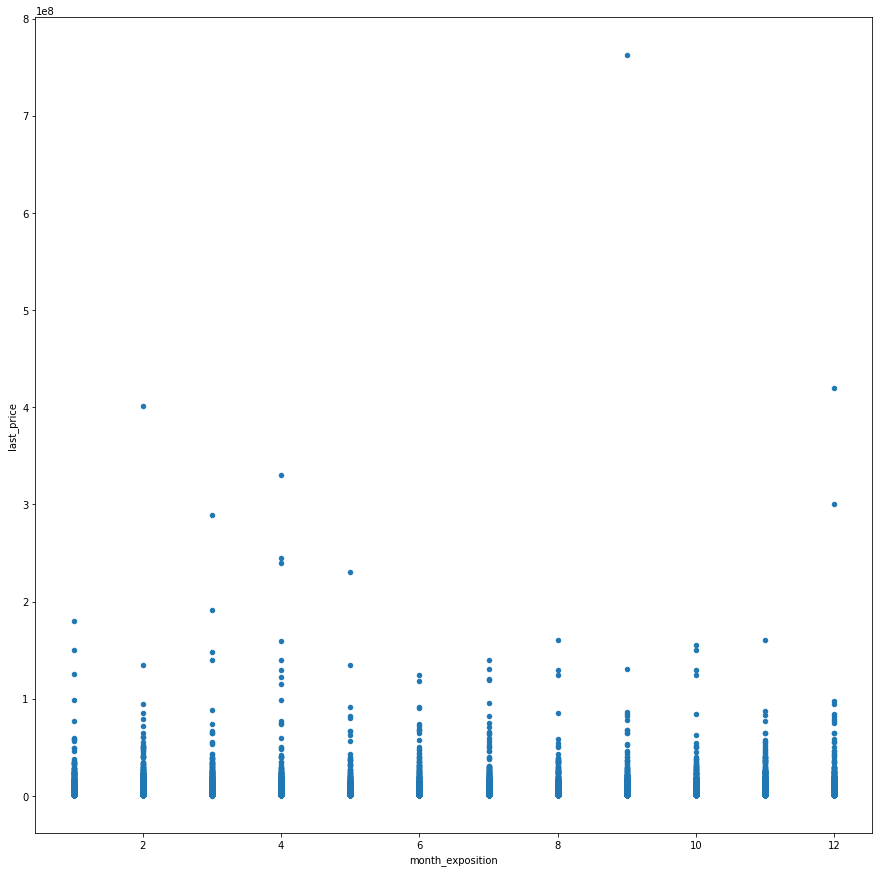

In [420]:
#Построим диаграмму зависимости цены от месяца
sample.plot(x='month_exposition', y='last_price', kind='scatter', figsize=(15, 15))

Самая дорогая квартира была размещена в 9-й месяц, то есть сентябрь, а в целом сильной зависимости не наблюдается.

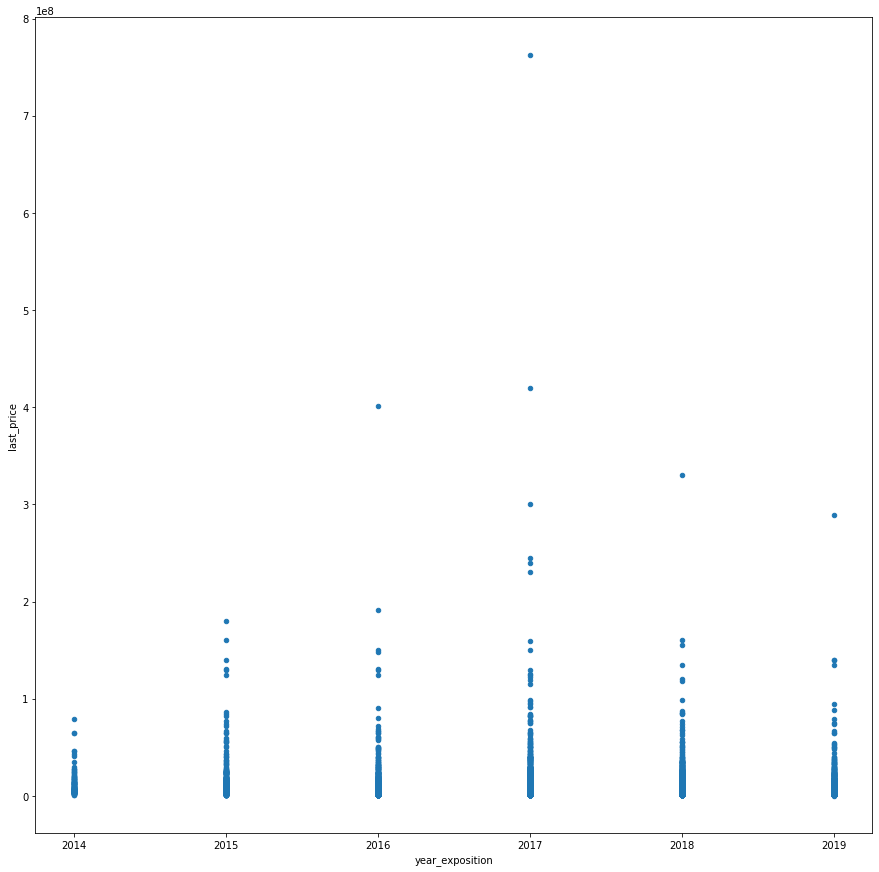

In [421]:
#Построим диаграмму зависимости цены от года
sample.plot(x='year_exposition', y='last_price', kind='scatter', figsize=(15, 15))

В 2017 году цены оказались самыми высокими. В 2014 году цены оказались самыми низкими.

В заключении построим матрицу диаграмм рассеяния, которая в первой строке даст нам необходимый набор диаграмм.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779c278d90>,
      dtype=object)

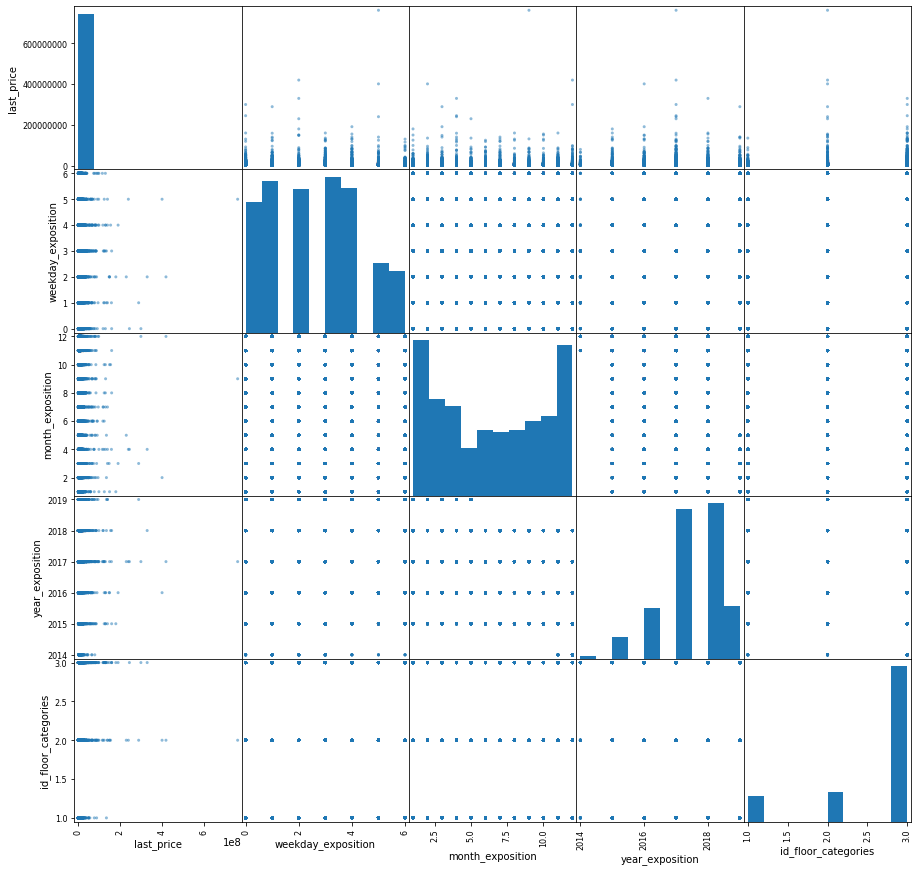

In [422]:
#Матрица диаграмм рассеяния
pd.plotting.scatter_matrix(sample, figsize=(15, 15)) 

In [423]:
#Исследование зависимости цены от дня размещения объявления
data['last_price'].corr(data['weekday_exposition'])

0.0015501452176215431

In [424]:
#Исследование зависимости цены от месяца размещения объявления
data['last_price'].corr(data['month_exposition'])

0.0027791287507397252

In [425]:
#Исследование зависимости цены от года размещения объявления
data['last_price'].corr(data['year_exposition'])

-0.04308903619950858

In [426]:
#Выбор 10 населенных пунктов с наибольшим числом объявлений
data10 = data['locality_name'].value_counts().head(10)

In [427]:
#Перечень 10 населенных пунктов с наибольшим числом объявлений
data10

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [428]:
#Средняя цена квадратного метра в данных населенных пунктах
data['mean_price'] = data.query('locality_name in @data10.index')['last_price'] / 1000000 / data.query('locality_name in @data10.index')['total_area']

In [429]:
#Регионы с самой высокой стоимостью жилья
data[['locality_name','mean_price']].sort_values('mean_price', ascending=False).head()

,locality_name,mean_price
12971,Санкт-Петербург,1.907500
1436,Санкт-Петербург,1.736842
22831,Санкт-Петербург,1.542605
14706,Санкт-Петербург,1.000748
4996,Санкт-Петербург,0.995984


mean_price указана в млн руб.

In [430]:
#Регионы с самой низкой стоимостью жилья
data[['locality_name','mean_price']].sort_values('mean_price', ascending=True).head()

,locality_name,mean_price
8793,Санкт-Петербург,0.000112
23477,Гатчина,0.010507
9471,Гатчина,0.010897
17753,Санкт-Петербург,0.015345
19952,Санкт-Петербург,0.015862


In [431]:
#Сортировка объявлений по расстоянию от центра с выводом расстояния
data[['locality_name','cityCenters_nearest']].sort_values('cityCenters_nearest', ascending=True).head(10)

,locality_name,cityCenters_nearest
13694,Санкт-Петербург,181.0
1182,Санкт-Петербург,208.0
8614,Санкт-Петербург,215.0
1934,Санкт-Петербург,287.0
20873,Санкт-Петербург,291.0
11723,Санкт-Петербург,318.0
11492,Санкт-Петербург,318.0
7726,Санкт-Петербург,318.0
13919,Санкт-Петербург,318.0
10377,Санкт-Петербург,318.0


Ближайшая к центру квартира расположена всего в 181 метре от центра, можно сказать, что расположена в центре города, в центральном районе. Остается выяснить расстояние до границы этого "центрального района" от его центра.

In [432]:
#Расстояние до центра города в Петербурге в км
data['cityCenters_nearest_km'] = round(data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'] / 1000)

In [433]:
#Просмотрим столбец с округленными данными о расстоянии до центра в км
data['cityCenters_nearest_km'].head()

0    16.0
1     NaN
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest_km, dtype: float64

In [434]:
# "Средняя цена для каждого километра"
data['last_price_per_km'] = round(data[data['locality_name'] == 'Санкт-Петербург']['last_price'] / (data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'] / 1000))

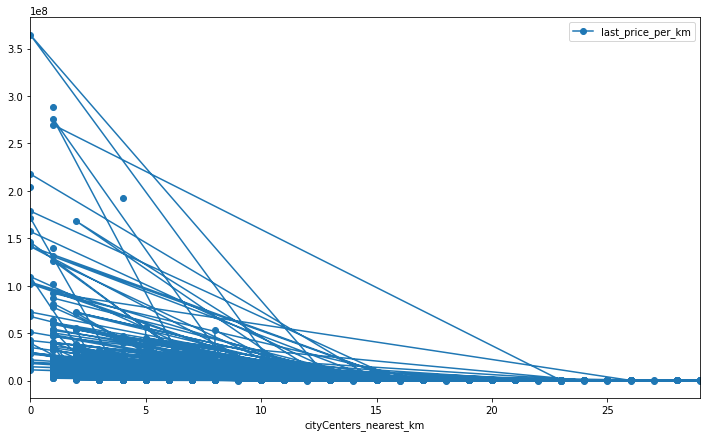

In [435]:
#Построение графиков зависимости двух вышеуказанных величин
data.plot(x='cityCenters_nearest_km', y='last_price_per_km', style='o-', figsize=(12, 7))

Здесь построена зависимость данных 'last_price_per_km' от 'cityCenters_nearest_km'. В зависимости от того ближе квартира к центру на 1 км или дальше от него на 1 км, ее цена больше на определенную сумму или меньше. Показатель 'last_price_per_km' говорит об этой разнице. А зависимость показывает как эта разница меняется с удалением от центра. В центральном районе цена зависит сильнее от близости к центру, а вне центрального района - слабее. Именно этим можно объяснить такую зависимость.

Из графика видно, что существенное изменение зависимости почти на всех графиках наблюдается в районе 10 км от центра. Следовательно, граница центрального района располагается в 10 км от центра.

In [439]:
#Выделим сегмент квартир в центре Петербурга c данными о площади, цене, числе комнат, высоте потолков.
#Здесь же выделим этаж, удалённость от центра, дату размещения объявления
data_center = data[data['locality_name'] == 'Санкт-Петербург'][data['cityCenters_nearest_km'] <= 10]\
[['total_area','last_price','rooms','ceiling_height','floor','cityCenters_nearest','first_day_exposition',\
 'weekday_exposition', 'month_exposition', 'year_exposition']].reset_index(drop = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [440]:
#Просмотр
data_center.head()

,total_area,last_price,rooms,ceiling_height,floor,cityCenters_nearest,first_day_exposition,weekday_exposition,month_exposition,year_exposition
0,159.0,64900000.0,3,NaN,9,6800.0,2015-07-24,4,7,2015
1,100.0,10000000.0,2,3.03,13,8098.0,2018-06-19,1,6,2018
2,31.6,3200000.0,1,NaN,2,9722.0,2018-03-14,2,3,2018
3,97.2,6500000.0,2,NaN,1,2336.0,2015-10-31,5,10,2015
4,149.0,15500000.0,5,NaN,4,3502.0,2017-06-26,0,6,2017


Далее изучим общую площадь в центре и по городу

In [441]:
#Площадь по всему городу
data[data['locality_name'] == 'Санкт-Петербург']['total_area'].describe()

count    15721.000000
mean        64.751488
std         40.417095
min         12.000000
25%         42.000000
50%         55.000000
75%         74.600000
max        900.000000
Name: total_area, dtype: float64

In [442]:
#Площадь в центре
data_center['total_area'].describe()

count    5434.000000
mean       82.550561
std        54.997958
min        12.000000
25%        47.900000
50%        69.650000
75%        97.875000
max       900.000000
Name: total_area, dtype: float64

Вывод: среднее и медианное значение площади в центре почти не отличаются от значений по городу

In [443]:
#Цена по всему городу
data[data['locality_name'] == 'Санкт-Петербург']['last_price'].describe()

count    1.572100e+04
mean     8.062507e+06
std      1.301313e+07
min      1.219000e+04
25%      4.200000e+06
50%      5.500000e+06
75%      8.160000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [444]:
#Цена в центре
data_center['last_price'].describe()

count    5.434000e+03
mean     1.237573e+07
std      2.090300e+07
min      1.219000e+04
25%      5.500000e+06
50%      8.000000e+06
75%      1.250000e+07
max      7.630000e+08
Name: last_price, dtype: float64

Вывод: средняя цена в центре больше, медианная цена в центре больше

In [445]:
#Количество комнат по всему городу
data[data['locality_name'] == 'Санкт-Петербург']['rooms'].describe()

count    15721.000000
mean         2.171618
std          1.148098
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [446]:
#Количество комнат в центре
data_center['rooms'].describe()

count    5434.000000
mean        2.583916
std         1.372754
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

Вывод: среднее и медианное число комнат по городу и в центре равно 2. 

In [447]:
#Высота потолков по всему городу
data[data['locality_name'] == 'Санкт-Петербург']['ceiling_height'].describe()

count    10104.000000
mean         2.803709
std          1.296912
min          1.000000
25%          2.550000
50%          2.700000
75%          2.870000
max        100.000000
Name: ceiling_height, dtype: float64

In [448]:
#Высота потолков в центре
data_center['ceiling_height'].describe()

count    3565.000000
mean        3.038738
std         1.898826
min         2.000000
25%         2.700000
50%         3.000000
75%         3.200000
max       100.000000
Name: ceiling_height, dtype: float64

Вывод: среднее от высоты потолков по всему городу и в центре равны, медианные значения тоже равны

Далее исследуется корреляция в центре и по городу между ценой и некоторыми факторами. 

In [449]:
#Число комнат по городу
data[data['locality_name'] == 'Санкт-Петербург']['rooms'].corr(data[data['locality_name'] == 'Санкт-Петербург']['last_price'])

0.37237533826763347

In [450]:
#Число комнат в центре
data_center['last_price'].corr(data_center['rooms'])

0.3592222618964666

Вывод: влияние на цену числа комнат по городу и в центре одинаковое

In [451]:
#Этаж по городу
data[data['locality_name'] == 'Санкт-Петербург']['floor'].corr(data[data['locality_name'] == 'Санкт-Петербург']['last_price'])

-0.000837942720881082

In [452]:
#Этаж в центре
data_center['floor'].corr(data[data['locality_name'] == 'Санкт-Петербург']['last_price'])

0.027333863484153936

Вывод: влияние на цену этажа в центре и по городу отсутствует

In [453]:
#Удаленность от центра по городу
data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].corr(data[data['locality_name'] == 'Санкт-Петербург']['last_price'])

-0.2595074646319885

In [454]:
#Удаленность от центра в центральном районе
data_center['cityCenters_nearest'].corr(data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'])

0.02973664888683966

Вывод: в центральном районе влияние на цену практически отсутствует, а по городу наблюдается обратная связь,то есть при удалении от центра цена незначительно растет. Это можно объяснить тем, что пригороды выглядят немного привлекательнее, чем остальные нецентральные районы.

Дата размещения объявления в центре. Исследовать корреляцию по данным типа datetime метод corr() не позволяет. Поэтому исследуем корреляцию отдельно по дню недели, месяцу и году.

In [456]:
# Корреляция цены от даты по городу
print(data['last_price'].corr(data['weekday_exposition']))
print(data['last_price'].corr(data['month_exposition']))
print(data['last_price'].corr(data['year_exposition']))

0.0015501452176215431
0.0027791287507397252
-0.04308903619950858


In [457]:
#Корреляция цены от даты в центральном районе
print(data_center['last_price'].corr(data_center['weekday_exposition']))
print(data_center['last_price'].corr(data_center['month_exposition']))
print(data_center['last_price'].corr(data_center['year_exposition']))

0.017281628009775025
0.004817552841137472
-0.05351480462865782


In [458]:
#Корреляция параметров по городу
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653675,0.363343,-0.206747
total_area,0.653675,1.000000,0.758344,-0.231446
rooms,0.363343,0.758344,1.000000,-0.184864
cityCenters_nearest,-0.206747,-0.231446,-0.184864,1.000000


In [459]:
#Корреляция параметров для центра города
data_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.646506,0.359222,-0.164522
total_area,0.646506,1.000000,0.760689,-0.273577
rooms,0.359222,0.760689,1.000000,-0.291614
cityCenters_nearest,-0.164522,-0.273577,-0.291614,1.000000


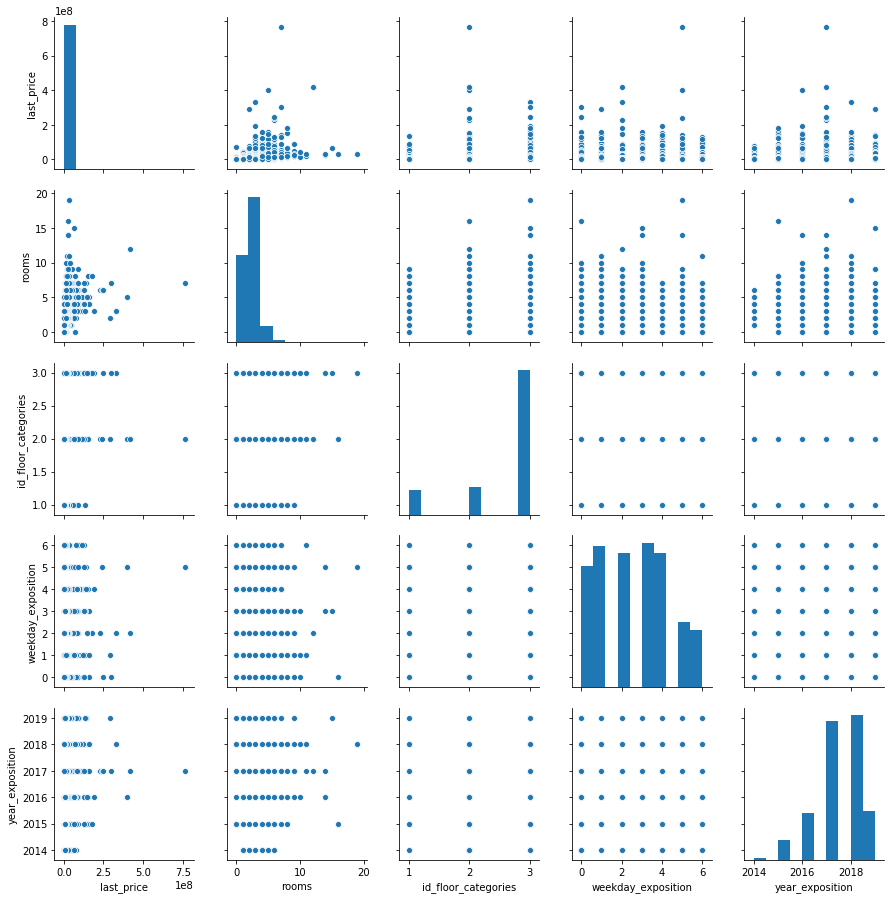

In [460]:
#Метод sns.pairplot
import seaborn as sns
sns.pairplot(data[['last_price', 'rooms', 'id_floor_categories', 'weekday_exposition', 'year_exposition']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7799e15ed0>,
      dtype=object)

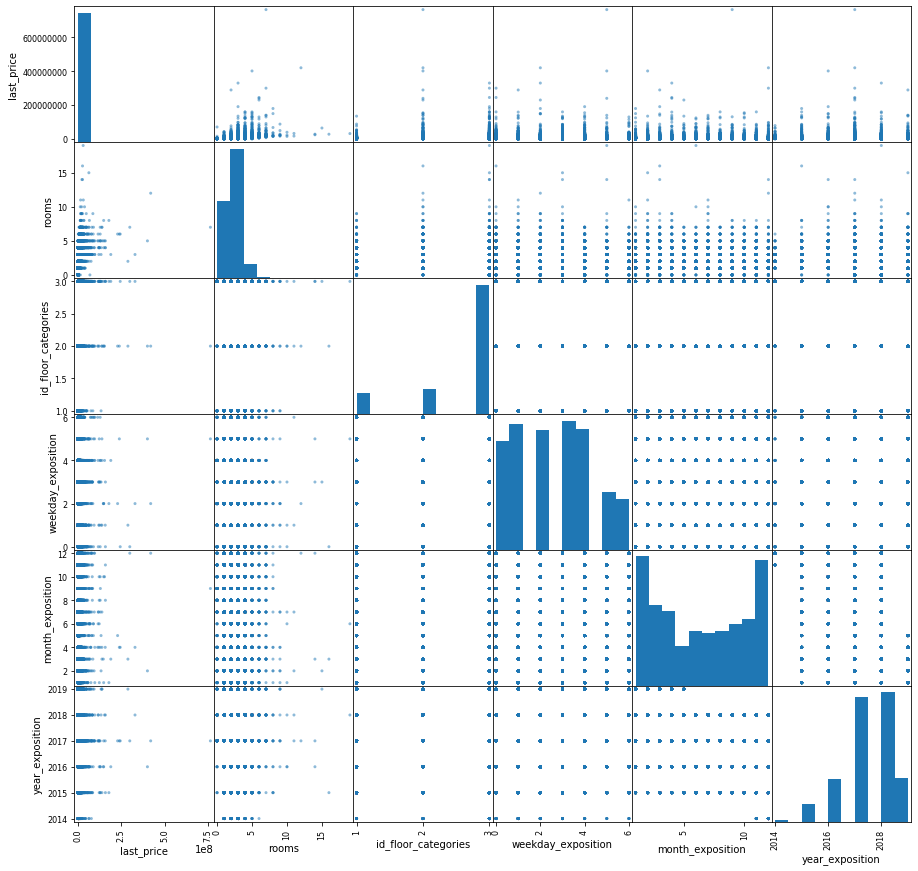

In [461]:
#Матрица диаграмм рассеяния
pd.plotting.scatter_matrix(data[['last_price','rooms', 'id_floor_categories', 'weekday_exposition', 'month_exposition', 'year_exposition']], figsize=(15, 15)) 

Вывод: По городу зависимости цены от даты не наблюдается. В центральном районе также зависимости не наблюдается.

Вывод по разделу 4: Было выявлено типичное время продажи квартир (меньше 95 дней), время быстрых продаж и долгих продаж. Проведено исследование данных с помощью графиков, выявлены границы центрального района с помощью анализа зависимости цены от удаленности от центра города. Были выявлены населенные пункты с наибольшим числом объявлений. Был выявлен сегмент квартир в центре и проведен сравнительный анализ с данными по всему городу.

## Общий вывод

Был проведен исследовательский анализ данных, на основании которого выл выделен центральный район и исследован сегмент квартир в данном районе в сравнении со всем городом. На цену наибольшее влияние оказывает площадь и число комнат, причём в центре и остальном городе одинаковое, а также, судя по графику зависмости цены от удаленности от центра - удаленность от центра в центральном районе. В остальных же районах удаленность от центра оказывает незначительное вляние на цену. Судя по диаграммам рассеяния, в целом самым дорогим на рынке является последний этаж, далее следуют другие этажи и самым дешевым можно считать первый этаж, В 2017 году цены оказались самыми высокими. В 2014 году цены оказались самыми низкими. Из представленных регионов, регионом с самой высокой стоимостью жилья является Санкт-Петербург, с самой низкой - опять же Санкт-Петербург и Гатчина. Средняя и медианная цена в центральном районе Санкт-Петербурга больше, чем в остальных районах.